In [2]:
import numpy as np
from main import HopfieldNetwork
import matplotlib.pyplot as plt
import random

## Ex 1. Storage capacity in the standard Hopfield network

if overlap = 1, then a pattern has been retrieved

if overlap = 0, then there is no correlation between pattern and state

if overlap = -1, then all the bits are exactly opposite of the pattern (kind of like negative correlation)


### 1.1

In [2]:
P = 5
N = 300

In [3]:
network = HopfieldNetwork(N,P)
#Setting inital state as the first pattern
network.set_states(network.patterns[0].copy())
network.compute_overlap()

[1.0, -0.04, -0.12000000000000001, -0.05333333333333334, 0.0]

In [4]:
t = 5
overlaps = np.zeros((t,P))
print("Overlap with patterns at the inital state")
print(network.overlaps)

Overlap with patterns at the inital state
[1.0, -0.04, -0.12000000000000001, -0.05333333333333334, 0.0]


In [5]:
for step in range(t):
    new_state = network.compute_next_state_fast()
    overlaps[step, :] = network.overlaps

In [6]:
overlaps

array([[ 1.        , -0.04      , -0.12      , -0.05333333,  0.        ],
       [ 1.        , -0.04      , -0.12      , -0.05333333,  0.        ],
       [ 1.        , -0.04      , -0.12      , -0.05333333,  0.        ],
       [ 1.        , -0.04      , -0.12      , -0.05333333,  0.        ],
       [ 1.        , -0.04      , -0.12      , -0.05333333,  0.        ]])

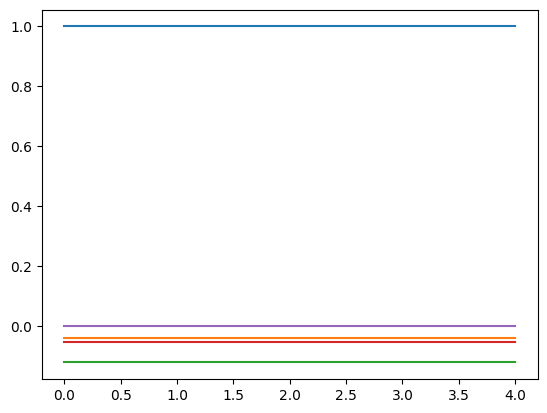

In [7]:
plt.plot(overlaps)

The overlap of the state S(t) with pattern 1 stays constant because the inital state is percisely already a retrieved pattern therefore, it is already in a stable state.

### 1.2

In [8]:
P = 200
N = 300

In [9]:
network = HopfieldNetwork(N,P)
#Setting inital state as the first pattern
network.set_states(network.patterns[0].copy())
network.overlaps = network.compute_overlap()

In [10]:
t = 5
overlaps = np.zeros((t,P))
print("Overlap with patterns at the inital state")
print(network.overlaps)

Overlap with patterns at the inital state
[1.0, -0.12000000000000001, 0.0, 0.04, 0.02666666666666667, -0.02666666666666667, 0.013333333333333334, -0.08, -0.04, 0.04, -0.04, 0.0, -0.06666666666666667, 0.05333333333333334, -0.05333333333333334, -0.013333333333333334, 0.05333333333333334, 0.06666666666666667, -0.04, 0.013333333333333334, 0.0, 0.013333333333333334, -0.02666666666666667, -0.09333333333333334, 0.0, 0.09333333333333334, -0.02666666666666667, 0.0, -0.02666666666666667, 0.05333333333333334, -0.06666666666666667, 0.04, 0.09333333333333334, -0.05333333333333334, 0.0, 0.0, 0.06666666666666667, 0.08, -0.05333333333333334, 0.08, -0.08, 0.06666666666666667, 0.05333333333333334, 0.06666666666666667, -0.02666666666666667, 0.04, 0.05333333333333334, 0.08, 0.0, 0.13333333333333333, -0.02666666666666667, -0.02666666666666667, 0.04, -0.02666666666666667, 0.05333333333333334, 0.02666666666666667, 0.02666666666666667, -0.08, 0.0, 0.04, -0.04, -0.04, 0.02666666666666667, 0.013333333333333334,

In [11]:
for step in range(t):
    curr_state = network.states
    new_state = network.compute_next_state_fast()
    if all(curr_state == new_state):
        print(step)
        print("Converged")
    overlaps[step, :] = network.overlaps

4
Converged


In [12]:
max(overlaps[-1][1:])

0.15333333333333335

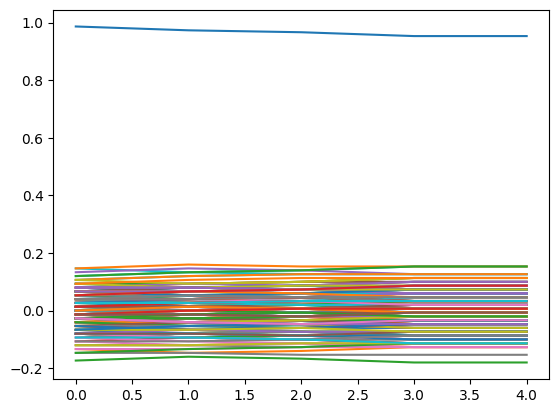

In [13]:
plt.plot(overlaps)

Why does the overlap m1(t) drop below 1? What does the network converge to instead of the first pattern?
Because the number of patterns is approching the number of neurons, this number of patterns is too big for the memory capacity of N neurons, meaning that if the inital state is identical to a pattern it moves away. The patterns become to similar, also making the probability of a flip bigger?, it converges to a state with 2 flipped bits. 

### 1.3 
Plot the overlap with all patterns over the time step t. Why does
the overlap m1(t) increase to 1 across time?

In [8]:
N = 600
P = 20
t = 30

In [ ]:
network = HopfieldNetwork(N,P)
#Setting inital state as the first pattern with 200 bits flipped
initial = network.patterns[0].copy()
N_flipped = 200
random_numbers = random.sample(range(600), N_flipped)
initial[random_numbers] = initial[random_numbers]*-1
network.set_states(initial)
network.compute_overlap()

[0.33333333333333337,
 0.03333333333333333,
 -0.07333333333333333,
 -0.060000000000000005,
 0.12666666666666668,
 0.013333333333333334,
 0.013333333333333334,
 -0.06666666666666667,
 0.013333333333333334,
 -0.03333333333333333,
 0.0,
 0.02666666666666667,
 -0.04666666666666667,
 0.0,
 0.060000000000000005,
 -0.05333333333333334,
 0.0,
 0.013333333333333334,
 -0.05333333333333334,
 -0.02]

In [10]:
overlaps = np.zeros((t,P))
print(network.overlaps)

[0.33333333333333337, 0.03333333333333333, -0.07333333333333333, -0.060000000000000005, 0.12666666666666668, 0.013333333333333334, 0.013333333333333334, -0.06666666666666667, 0.013333333333333334, -0.03333333333333333, 0.0, 0.02666666666666667, -0.04666666666666667, 0.0, 0.060000000000000005, -0.05333333333333334, 0.0, 0.013333333333333334, -0.05333333333333334, -0.02]


In [11]:
for step in range(t):
    new_state = network.compute_next_state_fast()
    overlaps[step, :] = network.overlaps.copy()

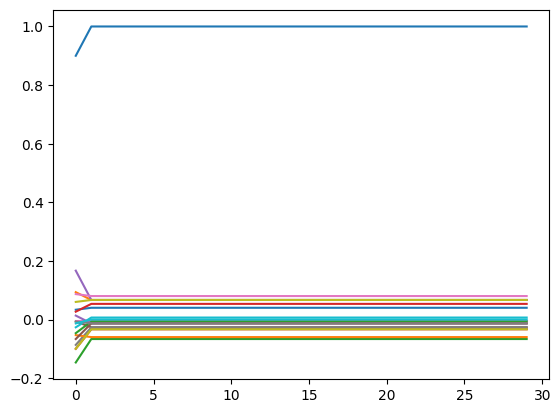

In [12]:
plt.plot(overlaps)

It converges, because the inital state is the most similar to that pattern, so the pattern retrieval will converge towards the most similar patterns, also because N >> P, so there is enough memory capacity

### 1.4 

In [13]:
N = 600
P = 20
t = 30

In [14]:
network = HopfieldNetwork(N,P)
#Setting inital state as the first pattern with 200 bits flipped
initial = network.patterns[0].copy()
N_flipped = 300
random_numbers = random.sample(range(600), N_flipped)
initial[random_numbers] = initial[random_numbers]*-1
network.set_states(initial)
network.compute_overlap()

[0.0,
 -0.06666666666666667,
 0.013333333333333334,
 0.03333333333333333,
 -0.006666666666666667,
 -0.06666666666666667,
 0.0,
 -0.11333333333333334,
 -0.013333333333333334,
 0.0,
 0.006666666666666667,
 0.02,
 0.013333333333333334,
 0.04,
 -0.013333333333333334,
 0.02,
 0.0,
 0.0,
 -0.02,
 -0.04]

In [15]:
overlaps = np.zeros((t,P))
print(network.overlaps)

[0.0, -0.06666666666666667, 0.013333333333333334, 0.03333333333333333, -0.006666666666666667, -0.06666666666666667, 0.0, -0.11333333333333334, -0.013333333333333334, 0.0, 0.006666666666666667, 0.02, 0.013333333333333334, 0.04, -0.013333333333333334, 0.02, 0.0, 0.0, -0.02, -0.04]


In [16]:
for step in range(t):
    new_state = network.compute_next_state_fast()
    overlaps[step, :] = network.overlaps.copy()

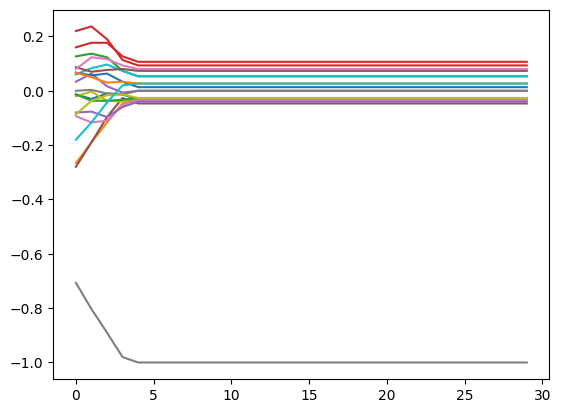

In [18]:
plt.plot(overlaps)

It kinda converges to some steady state around 0.

### 1.5
The size of the 'basin of attraction'

In [3]:
N_flipped = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300]
P = [20, 40, 60]
t = 20
N = 600

In [5]:
results = []
for p in P:
    network = HopfieldNetwork(N,p)
    for_p = {}
    for i in range(p):
        initial = network.patterns[i].copy()
        for_n = {}
        for n in N_flipped:
            random_numbers = random.sample(range(N), n)
            initial[random_numbers] = initial[random_numbers]*-1
            network.set_states(initial)
            network.compute_overlap()
            overlaps = np.zeros((t,p))
            retrived = False
            for step in range(t):
                new_state = network.compute_next_state_fast()
                overlaps[step, :] = network.overlaps.copy()
                if network.overlaps[i]==1:
                    retrived = True
            for_n.update({n:(overlaps, retrived)})
        for_p.update({i:for_n})
    results.append(for_p)

In [14]:
results[0].keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [19]:
plot_data = []
for data in results:
    fractions_per_flipped = {}
    for pattern,value in data.items():
        for n_flipped, output in value.items():
            if fractions_per_flipped.get(n_flipped)==None:
                a = 0
                if output[1]:
                    a = 1
                fractions_per_flipped.update({n_flipped:a})
            else:
                if output[1]:
                    v = fractions_per_flipped.get(n_flipped)
                    fractions_per_flipped.update({n_flipped:v+1})
    plot_data.append(fractions_per_flipped)

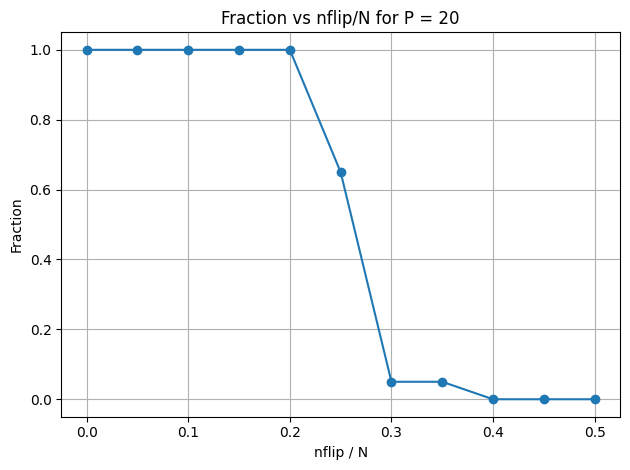

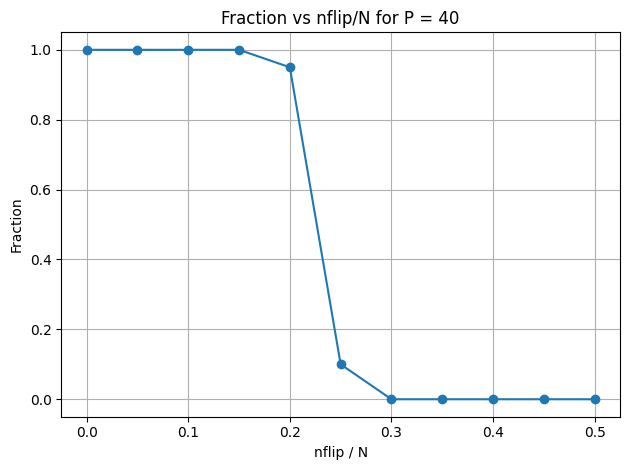

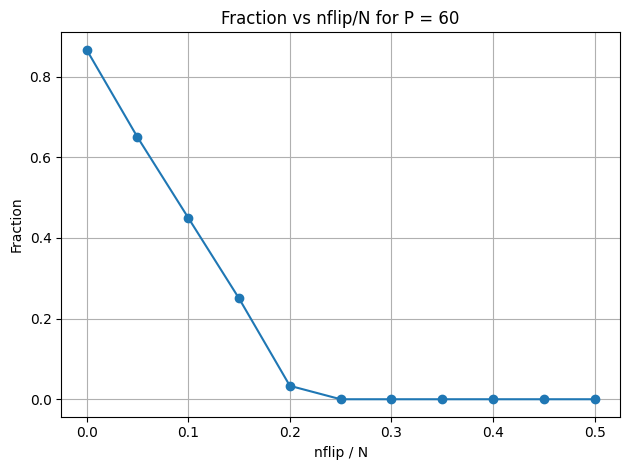

In [26]:
for i in range(len(plot_data)):
    p = P[i]
    data = plot_data[i]
    x= [nflip / N for nflip in data.keys()]
    y = [x/p for x in list(data.values())]
    # Plot
    plt.figure()
    plt.plot(x, y, marker='o')
    plt.title(f'Fraction vs nflip/N for P = {p}')
    plt.xlabel('nflip / N')
    plt.ylabel('Fraction')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### 1.6 
Capacity.

In [27]:
N = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500]

In [28]:
max_P = {}
for n in N:
    P = 0
    retrive = True
    while retrive:
        P += 1
        for p in range(P):
            network = HopfieldNetwork(n,P)
            network.set_states(network.patterns[p].copy())
            network.compute_overlap()
        
            new_state = network.compute_next_state_fast()
            if network.overlaps[p] != 1:
                retrive = False
    max_P.update({n:p-1})


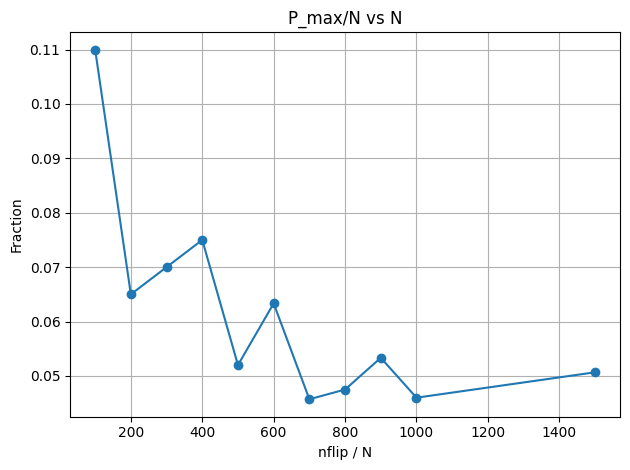

In [ ]:
#plot alpha against N

y = [y/x for x,y in max_P.items()]
x = N
# Plot
plt.figure()
plt.plot(x, y, marker='o')
plt.title(f'P_max/N vs N')
plt.xlabel('nflip / N')
plt.ylabel('Fraction')
plt.grid(True)
plt.tight_layout()
plt.show()

### 2.2

In [1]:
import numpy as np
from main import HopfieldNetwork
import matplotlib.pyplot as plt
import random

In [2]:
N_values = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500]
repeats = 5  # Repeat for averaging

max_P_ex2 = {N: [] for N in N_values}
for n in N_values:
    for r in range(repeats):
        P = 0
        retrieve = True
        while retrieve:
            # increment P, 
            P += 1
            #check for all paterns
            for p in range(P):
                network = HopfieldNetwork(n,P,n/2)
                network.set_states(network.patterns[p].copy())
                network.compute_overlap()
            
                new_state = network.compute_next_state_sparse()
                if network.overlaps[p] != 1:
                    # overlap between pattern and state no longer 1
                    retrieve = False
                    #get out of the for loop
                    break


        print(f"completed repeat {r}, N {n}")
        max_P_ex2[n].append(p-1)


completed repeat 0, N 100
completed repeat 1, N 100
completed repeat 2, N 100
completed repeat 3, N 100
completed repeat 4, N 100
completed repeat 0, N 200
completed repeat 1, N 200
completed repeat 2, N 200
completed repeat 3, N 200
completed repeat 4, N 200
completed repeat 0, N 300
completed repeat 1, N 300
completed repeat 2, N 300
completed repeat 3, N 300
completed repeat 4, N 300
completed repeat 0, N 400
completed repeat 1, N 400
completed repeat 2, N 400
completed repeat 3, N 400
completed repeat 4, N 400
completed repeat 0, N 500
completed repeat 1, N 500
completed repeat 2, N 500
completed repeat 3, N 500
completed repeat 4, N 500
completed repeat 0, N 600
completed repeat 1, N 600
completed repeat 2, N 600
completed repeat 3, N 600
completed repeat 4, N 600
completed repeat 0, N 700
completed repeat 1, N 700
completed repeat 2, N 700
completed repeat 3, N 700
completed repeat 4, N 700
completed repeat 0, N 800
completed repeat 1, N 800
completed repeat 2, N 800
completed re

In [3]:
capacity_means = {N:np.mean(fractions)/N for N,fractions in max_P_ex2.items()}
capacity_sterrs = {N:np.std([f/N for f in fractions]) for N,fractions in max_P_ex2.items()}

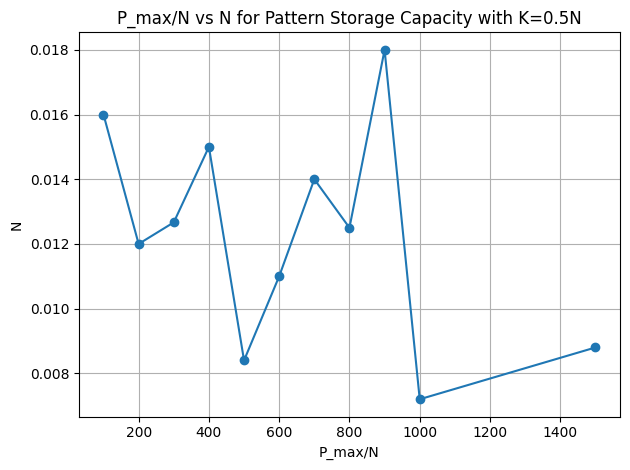

In [5]:
#plot alpha against N

# Plot
plt.figure()
plt.plot(capacity_means.keys(), capacity_means.values(), marker='o')
plt.title(f'P_max/N vs N for Pattern Storage Capacity with K=0.5N')
plt.xlabel('P_max/N')
plt.ylabel('N')
plt.grid(True)
plt.tight_layout()
plt.show()

### 2.3

In [6]:
N = 600  # Number of neurons
T = 30   # Number of update steps
P_values = [15, 20]  # Number of patterns
nflips_range = np.arange(0, 301, 30)
repeats = 5  # Repeat for averaging

In [8]:
# fractions retrieved is keyed by P, each value being a list across N_flipped
fractions_retrieved = {P: [] for P in P_values}
errors = {P: [] for P in P_values}

for P in P_values:
    for N_flipped in nflips_range:
        success_counts = []
        for r in range(repeats):
            network = HopfieldNetwork(N, P, int(N/2))
            success_count = 0
            for mu in range(P):
                # repeat for all patterns
                start_state = network.patterns[mu].copy()
                flip_indices = random.sample(range(N), N_flipped)
                start_state[flip_indices] *= -1
                network.set_states(start_state)
                network.compute_overlap(return_none=True)
                
                for step in range(T):
                    network.compute_next_state_sparse()
                final_state = network.states
                if np.array_equal(final_state, network.patterns[mu]):
                    success_count += 1

            # find success fractin for the N_flipped, P combination
            success_fraction = success_count / P
            success_counts.append(success_fraction)
            print(f"Completed repeat {r}, P {P}, N_flipped {N_flipped}, success fraction {success_fraction}")

        # average over repeats
        mean = np.mean(success_counts)
        stderr = np.std(success_counts) / np.sqrt(repeats)
        fractions_retrieved[P].append(mean)
        errors[P].append(stderr)

Completed repeat 0, P 15, N_flipped 0, success fraction 1.0
Completed repeat 1, P 15, N_flipped 0, success fraction 1.0
Completed repeat 2, P 15, N_flipped 0, success fraction 1.0
Completed repeat 3, P 15, N_flipped 0, success fraction 1.0
Completed repeat 4, P 15, N_flipped 0, success fraction 1.0
Completed repeat 0, P 15, N_flipped 30, success fraction 1.0
Completed repeat 1, P 15, N_flipped 30, success fraction 1.0
Completed repeat 2, P 15, N_flipped 30, success fraction 1.0
Completed repeat 3, P 15, N_flipped 30, success fraction 1.0
Completed repeat 4, P 15, N_flipped 30, success fraction 1.0
Completed repeat 0, P 15, N_flipped 60, success fraction 1.0
Completed repeat 1, P 15, N_flipped 60, success fraction 1.0
Completed repeat 2, P 15, N_flipped 60, success fraction 1.0
Completed repeat 3, P 15, N_flipped 60, success fraction 1.0
Completed repeat 4, P 15, N_flipped 60, success fraction 1.0
Completed repeat 0, P 15, N_flipped 90, success fraction 1.0
Completed repeat 1, P 15, N_f

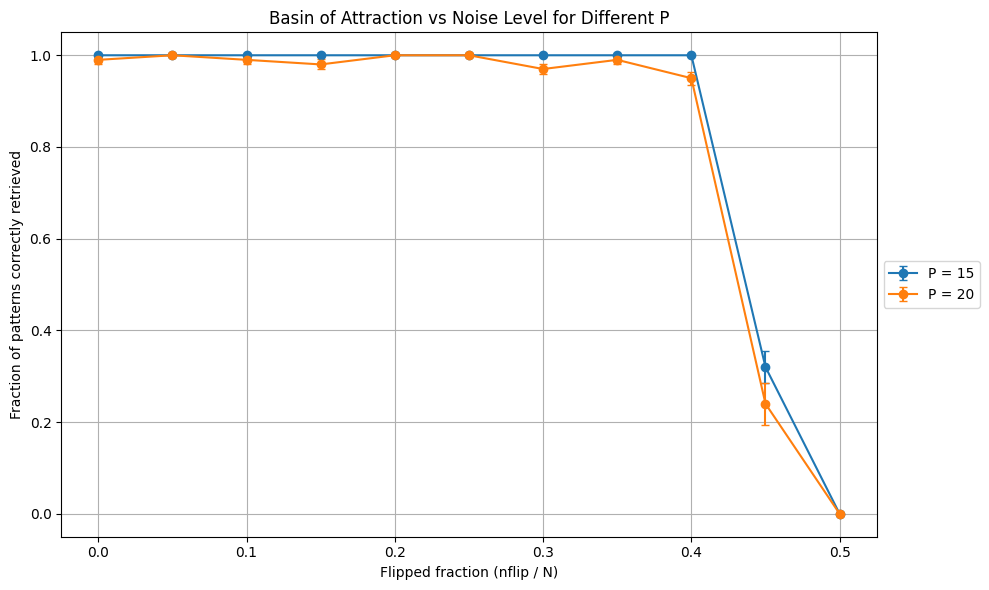

In [9]:
plt.figure(figsize=(10, 6))
for P in P_values:
    plt.errorbar(nflips_range / N, fractions_retrieved[P], yerr=errors[P], label=f"P = {P}", capsize=3, marker='o')

plt.xlabel("Flipped fraction (nflip / N)")
plt.ylabel("Fraction of patterns correctly retrieved")
plt.title("Basin of Attraction vs Noise Level for Different P")
plt.grid(True)
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.show()